In [12]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

In [13]:
# Import training data

data = pd.read_csv('training_data_vt2025.csv')

In [14]:
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,1600.0,11.371250,6.948370,0.00,5.000,12.000,17.000,23.000
day_of_week,1600.0,3.022500,2.012965,0.00,1.000,3.000,5.000,6.000
month,1600.0,6.468750,3.454741,1.00,3.000,6.000,9.000,12.000
holiday,1600.0,0.033125,0.179019,0.00,0.000,0.000,0.000,1.000
weekday,1600.0,0.710000,0.453904,0.00,0.000,1.000,1.000,1.000
summertime,1600.0,0.643750,0.479040,0.00,0.000,1.000,1.000,1.000
temp,1600.0,15.210313,9.264785,-9.10,7.700,15.500,23.200,35.600
dew,1600.0,7.750750,10.026459,-18.40,-0.800,8.300,16.800,24.300
humidity,1600.0,63.927844,19.079419,15.85,47.845,65.175,79.955,99.890
precip,1600.0,0.122042,0.920600,0.00,0.000,0.000,0.000,25.871


In [19]:
data['day_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)


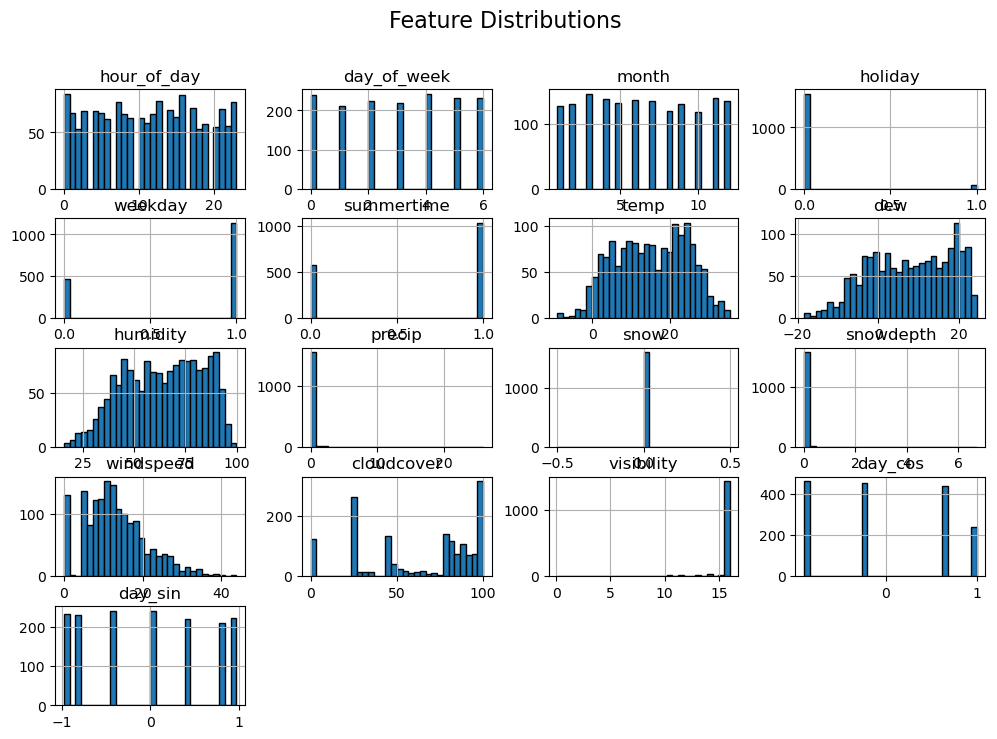

In [20]:
data.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


<Figure size 1200x600 with 0 Axes>

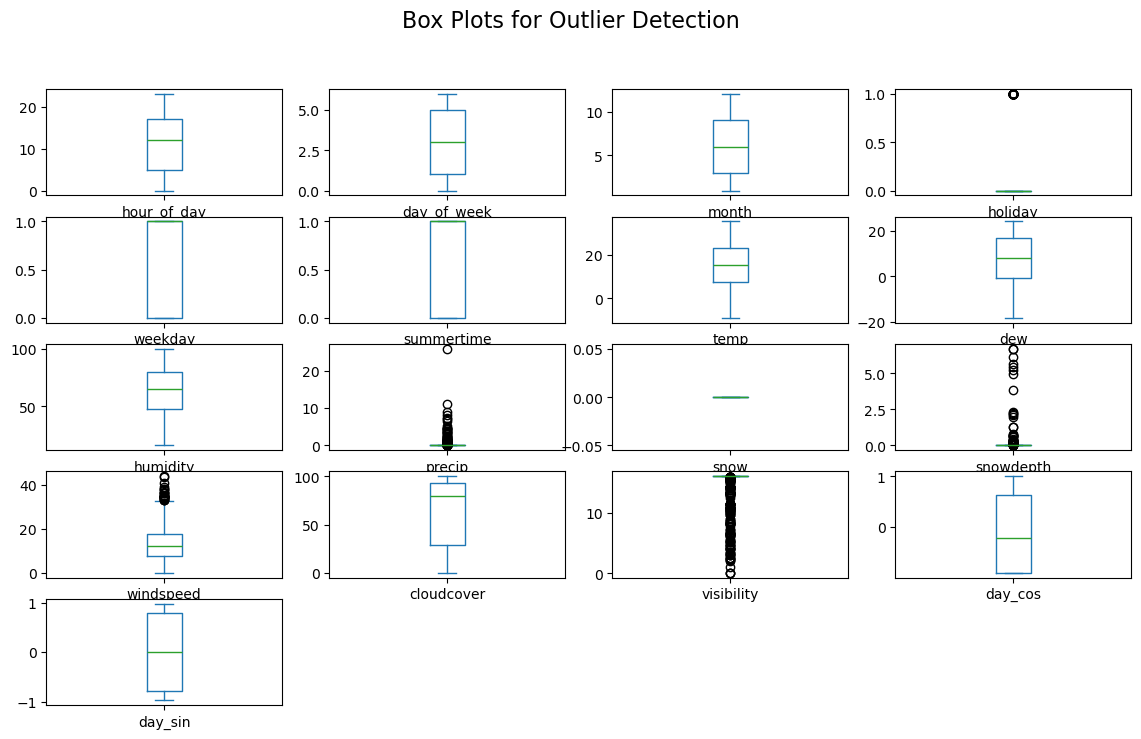

In [22]:
plt.figure(figsize=(12, 6))
data.plot(kind="box", subplots=True, layout=(5, 4), figsize=(14, 8), sharex=False, sharey=False)
plt.suptitle("Box Plots for Outlier Detection", fontsize=16)
plt.show()



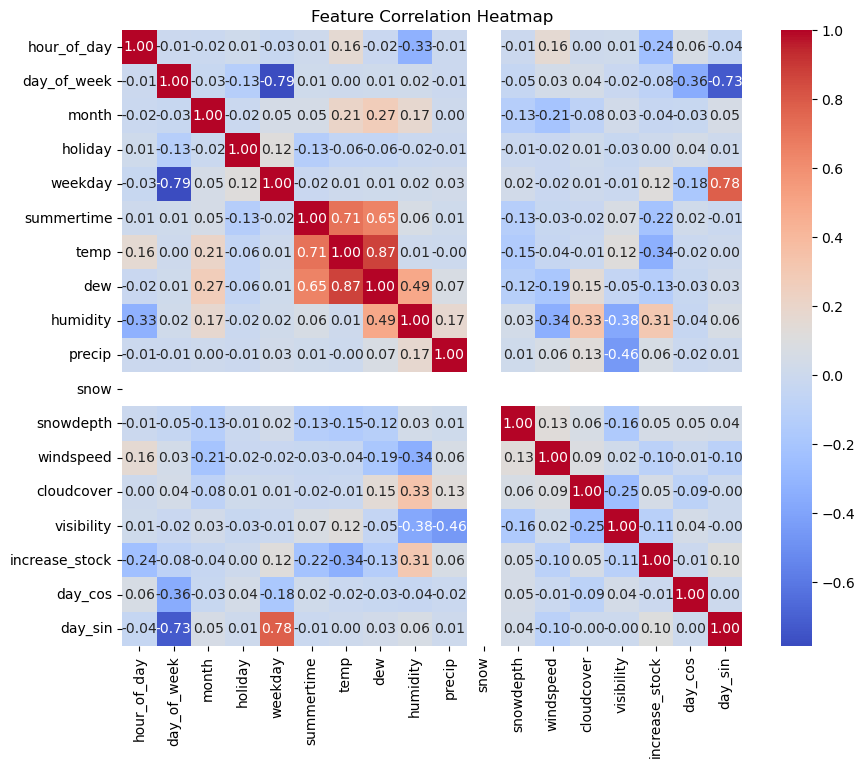

In [23]:
df_encoded = data.copy()
df_encoded["increase_stock"] = df_encoded["increase_stock"].astype('category').cat.codes  # Encode target as numeric
corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

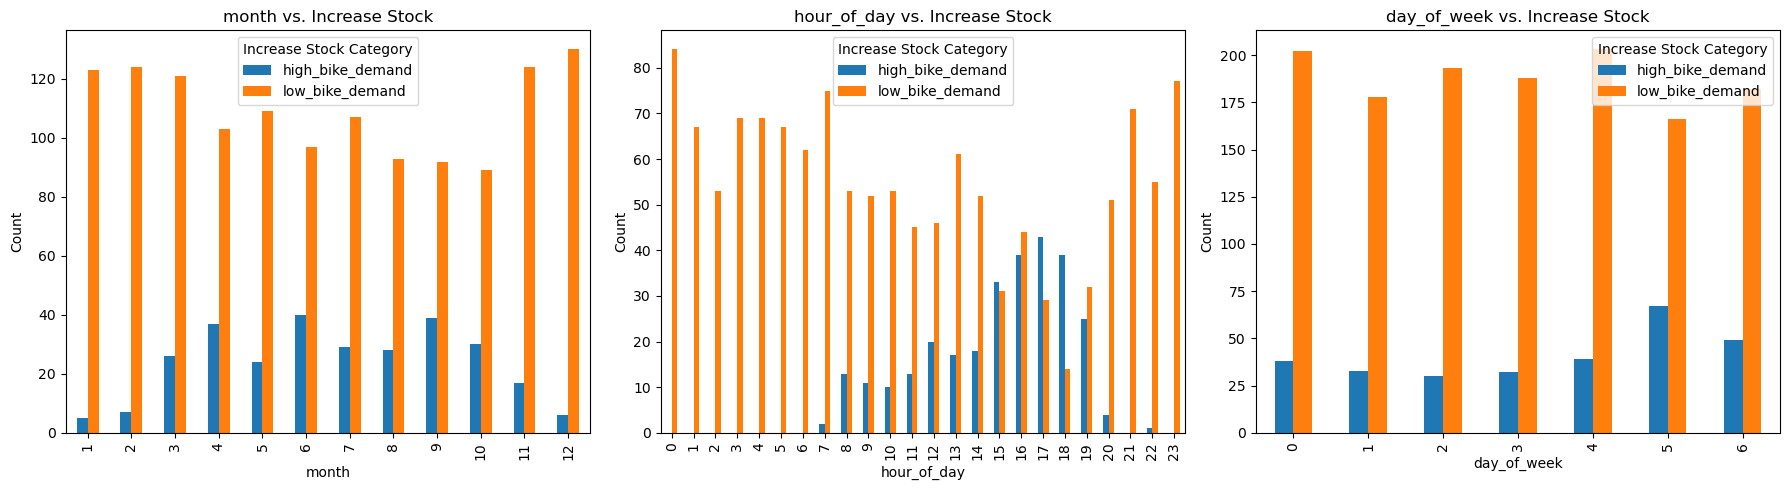

In [27]:
# Convert target variable to string if needed
data['increase_stock'] = data['increase_stock'].astype(str)

# Define categorical features
categorical_features = ['month', 'hour_of_day', 'day_of_week']

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust size as needed

# Loop through features and plot each on a separate subplot
for ax, feature in zip(axes, categorical_features):
    data.groupby(feature)['increase_stock'].value_counts().unstack().plot(kind='bar', ax=ax)
    ax.set_title(f'{feature} vs. Increase Stock')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Increase Stock Category')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
    

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
 16  day_cos         1600 non-null   float64
 17  day_sin         1600 non-null   f

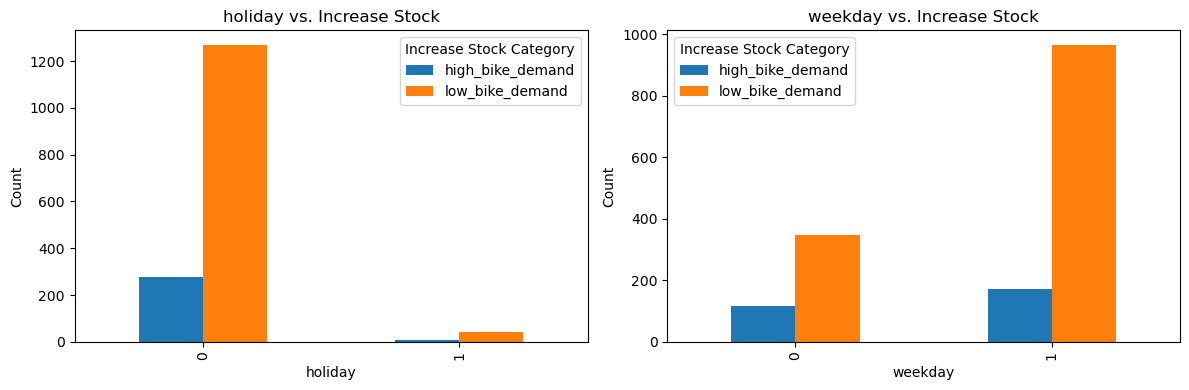

In [33]:
# Define categorical features
categorical_features = ['holiday', 'weekday']

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust size as needed

# Loop through features and plot each on a separate subplot
for ax, feature in zip(axes, categorical_features):
    data.groupby(feature)['increase_stock'].value_counts().unstack().plot(kind='bar', ax=ax)
    ax.set_title(f'{feature} vs. Increase Stock')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Increase Stock Category')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [34]:
# Calculate percentage distribution of increase_stock for holidays
holiday_counts = data.groupby("holiday")["increase_stock"].value_counts(normalize=True) * 100

# Calculate percentage distribution of increase_stock for weekdays
weekday_counts = data.groupby("weekday")["increase_stock"].value_counts(normalize=True) * 100

# Display the results
print("Percentage Distribution of Increase Stock for Holidays:")
print(holiday_counts, "\n")

print("Percentage Distribution of Increase Stock for Weekdays:")
print(weekday_counts)

Percentage Distribution of Increase Stock for Holidays:
holiday  increase_stock  
0        low_bike_demand     81.965094
         high_bike_demand    18.034906
1        low_bike_demand     83.018868
         high_bike_demand    16.981132
Name: proportion, dtype: float64 

Percentage Distribution of Increase Stock for Weekdays:
weekday  increase_stock  
0        low_bike_demand     75.000000
         high_bike_demand    25.000000
1        low_bike_demand     84.859155
         high_bike_demand    15.140845
Name: proportion, dtype: float64


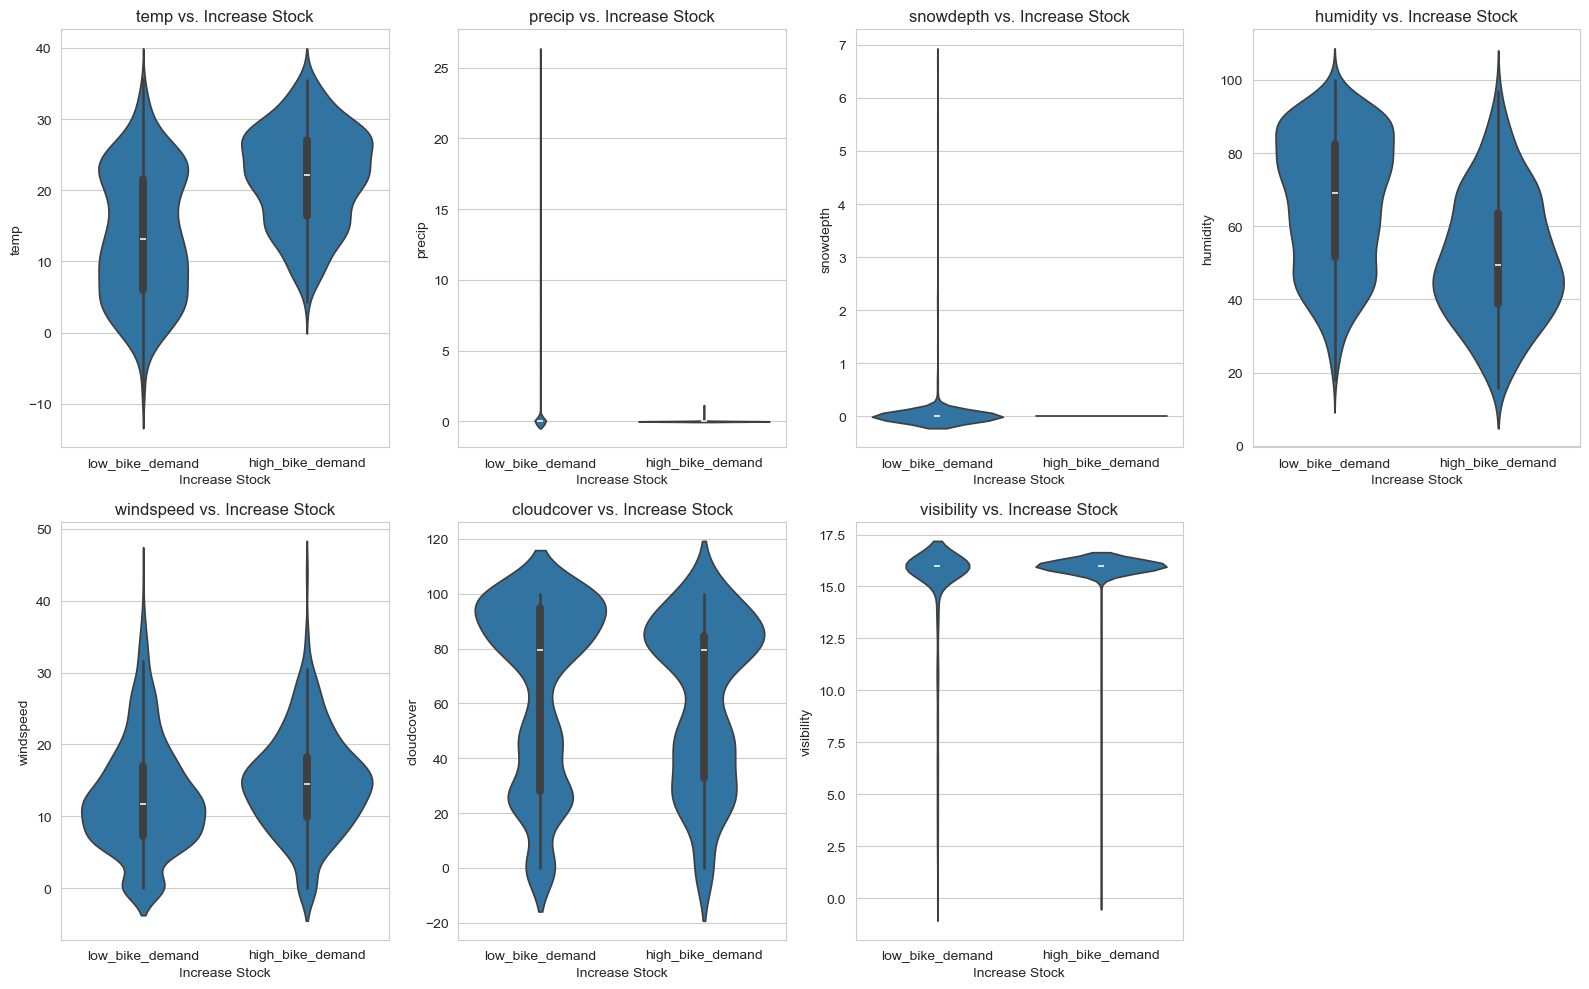

In [37]:
#Define the numerical features to compare against increase_stock
numeric_features = ['temp', 'precip', 'snowdepth', 'humidity', 'windspeed', 'cloudcover', 'visibility']

# Set plot style
sns.set_style("whitegrid")

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()

# Plot each numeric feature against increase_stock
for i, feature in enumerate(numeric_features):
    if i < len(axes):  # Avoid index errors if fewer than 8 features
        sns.violinplot(x="increase_stock", y=feature, data=data, ax=axes[i])
        axes[i].set_title(f"{feature} vs. Increase Stock")
        axes[i].set_xlabel("Increase Stock")
        axes[i].set_ylabel(feature)

# Remove empty subplot (since we have 7 plots but a 2x4 grid)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()